# Random memos on [Berry (1992): "Estimation of a Model of Entry in the Airline Industry"](https://www.jstor.org/stable/2951571?seq=1)

Two topics:
1. How complicated will it be to compute the distribution of equilibrium numbers of entrants?
2. How can we obtain the identitity of entrants under the assumed decision order?

# 1. Probability distribution of equilibrium entrant numbers


### K = 2
Let $K$ be the number of potential entrants in the market.
Also, the profit function of a firm after entry $k$ is $\pi_k(N) = v_k(N) + \epsilon_k$, where $v_k$ is a decreasing function in $N$.
Assume that the profit of non-entrants is zero.

When $K = 2$, the distribution is kind of easy to compute:

\begin{align}
    Pr(N^* = 0) 
    &= Pr(\pi_1(1) < 0, \pi_2(1) < 0) \\
    &= Pr(\epsilon_1 < - v_1(1), \epsilon_2 < - v_2(1)),
\end{align}

\begin{align}
    Pr(N^* = 2) 
    &= Pr(\pi_1(2) \ge 0, \pi_2(2) \ge 0) \\
    &= Pr(\epsilon_1 \ge - v_1(2), \epsilon_2 \ge - v_2(2)),
\end{align}

and

\begin{align}
    Pr(N^* = 1) 
    &= Pr((\pi_1(1) \ge 0, \pi_2(2) < 0) \ \text{or}\  (\pi_1(2) < 0, \pi_2(1) \ge 0)) \\
    &= Pr(\epsilon_1 \ge - v_1(1), \epsilon_2 < - v_2(2)) + Pr(\epsilon_1 < - v_1(2), \epsilon_2 \ge - v_2(1)) - Pr(- v_1(1) \le \epsilon_1 < - v_1(2), - v_2(1) \le \epsilon_2 < - v_2(2))
\end{align}.

For these probabilities, see the diagram below:
the red area is for $N^* = 2$, the blue area is for $N^* = 0$, and the other area is for $N^* = 1$
(The idea of this diagram is retrieved from [Kohei Kawaguchi's lecture note](https://kohei-kawaguchi.github.io/EmpiricalIO/entryexit.html#multiple-prediction-in-bivariate-game-with-heterogenous-profits)).

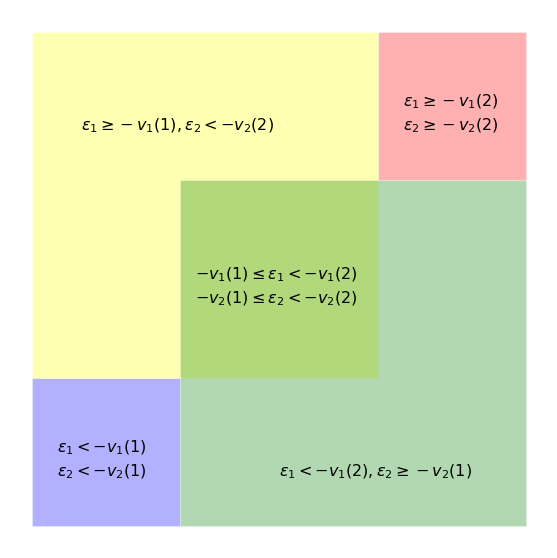

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

v_1 = [2, -2]
v_2 = [2, -2]


plt.figure(figsize=(10,10))
# plt.axes()
rec_N_0 = plt.Rectangle((-5, -5), -v_1[0] - (-5), -v_2[0] - (-5), fc = 'blue', ec = 'white', alpha = 0.3)
rec_N_2 = plt.Rectangle((5, 5), -v_1[1] - (5), -v_2[1] - (5), fc = 'red', ec = 'white', alpha = 0.3)
rec_N_1_1 = plt.Rectangle((-v_2[1], -v_1[0]), -5 - (-v_2[1]), 5 - (-v_1[0]), fc = 'yellow', ec = 'white', alpha = 0.3)
rec_N_1_2 = plt.Rectangle((-v_2[0], -v_1[1]), 5 - (-v_2[0]), -5 - (-v_1[1]), fc = 'green', ec = 'white', alpha = 0.3)

plt.gca().add_patch(rec_N_0)
plt.gca().add_patch(rec_N_2)
plt.gca().add_patch(rec_N_1_1)
plt.gca().add_patch(rec_N_1_2)

plt.text(-4, 3, '$\epsilon_1 \geq - v_1(1), \epsilon_2 < - v_2(2)$', fontsize = 16)
plt.text(0, -4, '$\epsilon_1 < - v_1(2), \epsilon_2 \geq - v_2(1)$', fontsize = 16)
plt.text(-1.7, 0, '$- v_1(1) \leq \epsilon_1 < - v_1(2)$', fontsize = 16)
plt.text(-1.7, -0.5, '$- v_2(1) \leq \epsilon_2 < - v_2(2)$', fontsize = 16)
plt.text(-4.5, -3.5, '$\epsilon_1 < - v_1(1)$', fontsize = 16)
plt.text(-4.5, -4.0, '$\epsilon_2 < - v_2(1)$', fontsize = 16)
plt.text(2.5, 3.5, '$\epsilon_1 \geq - v_1(2)$', fontsize = 16)
plt.text(2.5, 3.0, '$\epsilon_2 \geq - v_2(2)$', fontsize = 16)

plt.axis('off')
plt.axis('scaled')
plt.show()

### Comparison with the general formula

Berry (1992) provides a general formula, so let's use this and compare the solutions.
First, there are less than $N + 1$ firms in an equilibrium if and only if no more than $N$ firms could make profits in an equilibrium with $N + 1$ firms (otherwise, there would be more than or equal to $N + 1$ firms in an equilibrium):

$$
    N^* \le N \Leftrightarrow \#\{ \epsilon_k: \epsilon_k \ge -v_k(N + 1)\} \le N.
$$

A vector $\epsilon = (\epsilon_1, \dots, \epsilon_K)$ satisifes this condition if and only if it is a member of one of the disjoint sets

$$
    (\epsilon: \# \{\epsilon_k: \epsilon_k \ge -v_k(N + 1)\} = j) \quad (j = 0, \dots, N).
$$

So, the probability that $N^* \le N$ is the sum of the probabilities of these $N + 1$ sets.
Here, let $H_{j, (N + 1)}$ be the probability $Pr(\# \{\epsilon_k: \epsilon_k \ge -v_k(N + 1)\} = j)$.
This is the probability that exactly $j$ firms can make profits in a $(N + 1)$-firm equilibrium.

Then,
$$
    H_{j, N} = \sum_{s \in S(j)} \int_{A_1(s, N)} \cdots \int_{A_K(s, N)} p(\epsilon) d\epsilon.
$$
Note that $p(\epsilon)$ may not be split into $p(\epsilon_1) \cdots p(\epsilon_K)$ because they mey not be independent.
For example, in Berry (1992), they are correlated due to the market-level unobservables.
Here, $s$ is the vector of entrance status and the set $S(j)$ is the combination of $j$ firms from the potential $K$ entrants.
The area $A_k(s, N)$ is

$$
    A_k(s, N) = \begin{cases}
        (-v_k(N), \infty) & \text{if $s_k = 1$, and} \\
        (- \infty, -v_k(N)) & \text{otherwise.} \\
        \end{cases}
$$

Now, the probability for $N^* \le N$ is
$$
    Pr(N^* \le N) = \sum_{j = 0}^N H_{j, (N + 1)},
$$
and the probability of an $N$-firm equilibrium is
$$
    Pr(N^* = N) = Pr(N^* \le N) - Pr(N^* \le N - 1).
$$

Given this, the goal here is to obtain $Pr(N^* = 1)$, and for this, we need to calculate $Pr(N^* \le 1)$ (as shown above, $Pr(N^* \le 0) = Pr(N^* = 0)$ is trivial).
I will derive $H_{0, 2}$ and $H_{1, 2}$ and sum them up to get $Pr(N^* \le 1)$.

\begin{align}
    H_{0, 2} 
    &= \sum_{s \in S(0)} \int_{A_1(s, 2)} \int_{A_2(s, 2)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (- \infty, -v_2(2))} p(\epsilon) d\epsilon,
\end{align}

\begin{align}
    H_{1, 2} 
    &= \sum_{s \in S(1)} \int_{A_1(s, 2)} \int_{A_2(s, 2)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (-v_1(2), \infty)} \int_{\epsilon_2 \in (- \infty, -v_2(2))} p(\epsilon) d\epsilon + 
       \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (-v_2(2), \infty)} p(\epsilon) d\epsilon.
\end{align}

Hence, 
$$
    Pr(N^* \le 1) = H_{0, 2} + H_{1, 2} = \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (- \infty, -v_2(2))} p(\epsilon) d\epsilon +
    \int_{\epsilon_1 \in (-v_1(2), \infty)} \int_{\epsilon_2 \in (- \infty, -v_2(2))} p(\epsilon) d\epsilon + 
       \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (-v_2(2), \infty)} p(\epsilon) d\epsilon.
$$
This is the sum of the blue, yellow, and green areas in the diagram above.
Hence, subtracting $Pr(N^* = 0)$ (blue area) from this, we can recover $Pr(N^* = 1)$ derived above.
Yay!

### K = 3
How about the case where $K = 3$?
This seems complicated...
Conceptually, instead of the 2D diagram considered before, you can think of a 3D diagram and the size of each compartment separated by $v_k(N)$'s.

$N^*= 0$ and $3$ are easy:

\begin{align}
    Pr(N^* = 0) 
    &= Pr(\pi_1(1) < 0, \pi_2(1) < 0, \pi_3(1) < 0) \\
    &= Pr(\epsilon_1 < - v_1(1), \epsilon_2 < - v_2(1), \epsilon_3 < - v_3(1)),
\end{align}
and
\begin{align}
    Pr(N^* = 3) 
    &= Pr(\pi_1(3) \ge 0, \pi_2(3) \ge 0, \pi_3(3) \ge 0) \\
    &= Pr(\epsilon_1 \ge - v_1(3), \epsilon_2 \ge - v_2(3), \epsilon_3 \ge - v_3(3)).
\end{align}


For $N^* = 1$, one firm has to have a positive profit with one firm in the market but the other two firms have to have negative profits with two firms in the market.
Hence,
$$
    Pr(N^* = 1) = Pr((\pi_1(1) \ge 0, \pi_2(2) < 0, \pi_3(2) < 0) \ \text{or}\ (\pi_1(2) < 0, \pi_2(1) \ge 0, \pi_3(2) < 0) \ \text{or}\ (\pi_1(2) < 0, \pi_2(2) < 0, \pi_3(1) \ge 0)).
$$
We need to be careful with the overlaps of the 3D regions when calculating this, which seems too complicated!

So, let me use the general formula above.
Here, I calculate $H_{0, 2}$ and $H_{1, 2}$ (I am using the same notation as before, but this time, there are three potential entrants in the market).

\begin{align}
    H_{0, 2} 
    &= \sum_{s \in S(0)} \int_{A_1(s, 2)} \int_{A_2(s, 2)} \int_{A_3(s, 2)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (- \infty, -v_2(2))} \int_{\epsilon_3 \in (- \infty, -v_3(2))} p(\epsilon) d\epsilon,
\end{align}

\begin{align}
    H_{1, 2} 
    &= \sum_{s \in S(1)} \int_{A_1(s, 2)} \int_{A_2(s, 2)} \int_{A_3(s, 2)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (-v_1(2), \infty)} \int_{\epsilon_2 \in (- \infty, -v_2(2))} \int_{\epsilon_3 \in (- \infty, -v_3(2))} p(\epsilon) d\epsilon + \\ 
    &\quad \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (-v_2(2), \infty)} \int_{\epsilon_3 \in (- \infty, -v_3(2))} p(\epsilon) d\epsilon + \\
    &\quad \int_{\epsilon_1 \in (- \infty, -v_1(2))} \int_{\epsilon_2 \in (- \infty, -v_2(2))} \int_{\epsilon_3 \in (-v_3(2), \infty)} p(\epsilon) d\epsilon.
\end{align}

Summing up $H_{0, 2}$ and $H_{1, 2}$ to get $Pr(N^* \le 1)$ and subtacting $Pr(N^* = 0)$, we can obtain $Pr(N^* = 1)$.

How about $Pr(N^* = 2)$?
For this, I calculate $H_{0, 3}$, $H_{1, 3}$, and $H_{2, 3}$:

\begin{align}
    H_{0, 3} 
    &= \sum_{s \in S(0)} \int_{A_1(s, 3)} \int_{A_2(s, 3)} \int_{A_3(s, 3)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (- \infty, -v_1(3))} \int_{\epsilon_2 \in (- \infty, -v_2(3))} \int_{\epsilon_3 \in (- \infty, -v_3(3))} p(\epsilon) d\epsilon,
\end{align}

\begin{align}
    H_{1, 3} 
    &= \sum_{s \in S(1)} \int_{A_1(s, 3)} \int_{A_2(s, 3)} \int_{A_3(s, 3)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (-v_1(3), \infty)} \int_{\epsilon_2 \in (- \infty, -v_2(3))} \int_{\epsilon_3 \in (- \infty, -v_3(3))} p(\epsilon) d\epsilon + \\ 
    &\quad \int_{\epsilon_1 \in (- \infty, -v_1(3))} \int_{\epsilon_2 \in (-v_2(3), \infty)} \int_{\epsilon_3 \in (- \infty, -v_3(3))} p(\epsilon) d\epsilon + \\
    &\quad \int_{\epsilon_1 \in (- \infty, -v_1(3))} \int_{\epsilon_2 \in (- \infty, -v_2(3))} \int_{\epsilon_3 \in (-v_3(3), \infty)} p(\epsilon) d\epsilon,
\end{align}

and

\begin{align}
    H_{2, 3} 
    &= \sum_{s \in S(2)} \int_{A_1(s, 3)} \int_{A_2(s, 3)} \int_{A_3(s, 3)} p(\epsilon) d\epsilon \\
    &= \int_{\epsilon_1 \in (-v_1(3), \infty)} \int_{\epsilon_2 \in (-v_2(3), \infty)} \int_{\epsilon_3 \in (- \infty, -v_3(3))} p(\epsilon) d\epsilon + \\ 
    &\quad \int_{\epsilon_1 \in (-v_1(3), \infty)} \int_{\epsilon_2 \in (- \infty, -v_2(3))} \int_{\epsilon_3 \in (-v_3(3), \infty)} p(\epsilon) d\epsilon + \\
    &\quad \int_{\epsilon_1 \in (- \infty, -v_1(3))} \int_{\epsilon_2 \in (-v_2(3), \infty)} \int_{\epsilon_3 \in (-v_3(3), \infty)} p(\epsilon) d\epsilon.
\end{align}

Now, to obtain $Pr(N^* = 2)$, we can sum them up to get $Pr(N^* \le 2)$ and subtract $Pr(N^* \le 1)$ derived above from it.

Do I want to do this for $K = 4$?
Nah.
Do I want to do this for $K = 26$ as in Berry (1992)?
Definitely not.
That is why Berry used a simulation method.

# 2. Identity of entrants and entry order assumption

Even without assuming the entry order, the number of entrants is unique in the equilibrium if the profit is monotonically decreasing in the firm numbers in the market.
Hence, we can estimate the parameters without the entry order assumption by comparing the equilibrium number of entrants and the observed firm numbers in the market.

If we further assume the order of entries, we can uniquely identify which firms entered to the market (because pure sub-game perfect Nash equilibrium (SPNE) is unique).
But how exactly can we do it?
I guess one way is to solve SPNE for each case, but with many simulations and with many markets, this is cumbersome.
Berry (1992) proposes methods to pin down the identities of entrants, under two different entry order assumptions separately.


To demonstrate the methods, I prepare a toy example market.
There are five potential entrants (i.e., $K = 5$), and their profit function is $\pi_k(N) = \epsilon_k - 2 N$.
Suppose that $(\epsilon_1, \dots, \epsilon_5) = (11, 7, 9, 1, 5)$.

### Equilibrium number of entrants

In either assumption, I will need the equilibrium number of entrants (and this is uniquely determined regardless of the entry order assumption: `Result` in Berry (1992), p.894)).
For this, I use the following formula provided in Berry (1992) (equation (12)):

$$
    N^* = \max_{0 \le n \le K} (n: \# \{k: \pi_k(n) \ge 0 \} \ge n).
$$

This equation implies that, at an equilibrium with $N^*$, adding one more firm to the market makes less than $N^* + 1$ firms profitable:
that is, at least some entrants have negative profits because $N^* + 1$ firms are in the market but less than $N^* + 1$ firms have non-negative profits.

Given this, I get the equilibrium entrant number.
For each number of entrants, $N$, the profits of the firms will look like this:

In [93]:
import pandas as pd
import numpy as np

epsilon = np.array([11, 7, 9, 1, 5])
profit_table = pd.DataFrame({
    "N = 1": epsilon - 2 * 1,
    "N = 2": epsilon - 2 * 2,
    "N = 3": epsilon - 2 * 3,
    "N = 4": epsilon - 2 * 4,
    "N = 5": epsilon - 2 * 5
    }
)
profit_table.index = ["Firm " + str(i) for i in np.arange(1, 6)]
profit_table

,N = 1,N = 2,N = 3,N = 4,N = 5
Firm 1,9,7,5,3,1
Firm 2,5,3,1,-1,-3
Firm 3,7,5,3,1,-1
Firm 4,-1,-3,-5,-7,-9
Firm 5,3,1,-1,-3,-5


When $N = 3$, exactly three firms are profitable (Firms 1, 2, and 3).
However, when $N = 4$, only two firms (Firms 1 and 3) are profitable.
Hence, $N^* = 3$.
(Note that I did not use the entry order assumption at all in deriving $N^*$.)

### When entry order is by profitability (high-profit firm -> low-profit firm)

If the entry order is by profitability, then the order of entry will be `Firm 1 -> Firm 3 -> Firm 2 -> Firm 5 -> Firm 4`.
The appendix of Berry (1992) describes that, in this case, the first $N^*$ firms will enter ($N^*$ is already derived above).
So, under the entry order by profitability, the entrants will be Firms 1, 3, and 2.
Easy!

But is this correct?
We can ensure this by solving the SPNE by backward induction.

#### Firm 4

Here, the identity of entrants does not affect the profit.
So, I just consider how many firms are in the market.

- If there are already 4 firms in the market, 
    - entering makes Firm 4's profit $-9$, 
    - so, exit
- If there are already 3 firms in the market, 
    - entering makes Firm 4's profit $-7$, 
    - so, exit
- If there are already 2 firms in the market, 
    - entering makes Firm 4's profit $-5$, 
    - so, exit
- If there is already 1 firm in the market, 
    - entering makes Firm 4's profit $-3$, 
    - so, exit
- If there is 0 firm in the market, 
    - entering makes Firm 4's profit $-1$, 
    - so, exit

#### Firm 5

- If there are already 3 firms in the market, 
    - if Firm 5 enters => Firm 4 exits => N = 4, which makes Firm 5's profit $-3$,
    - so, exit
- If there are already 2 firms in the market,
    - if Firm 5 enters => Firm 4 exits => N = 3, which makes Firm 5's profit $-1$,
    - so, exit
- If there is already 1 firm in the market,
    - if Firm 5 enters => Firm 4 exits => N = 2, which makes Firm 5's profit $1$,
    - so, enter
- If there is 0 firm in the market,
    - if Firm 5 enters => Firm 4 exits => N = 1, which makes Firm 5's profit $3$,
    - so, enter

#### Firm 2

- If there are already 2 firms in the market,
    - if Firm 2 enters => Firm 5 exits => Firm 4 exits => N = 3, which makes Firm 2's profit $1$,
    - so, enter
- If there is already 1 firm in the market,
    - if Firm 2 enters => Firm 5 enters => Firm 4 exits => N = 3, which makes Firm 2's profit $1$,
    - so, enter
- If there is 0 firm in the market,
    - if Firm 2 enters => Firm 5 enters => Firm 4 exits => N = 2, which makes Firm 2's profit $3$,
    - so, enter

#### Firm 3

- If there is already 1 firm in the market,
    - if Firm 3 enters => Firm 2 enters => Firm 5 exits => Firm 4 exits => N = 3, which makes Firm 3's profit $3$,
    - so, enter
- If there is 0 firm in the market,
    - if Firm 3 enters => Firm 2 enters => Firm 5 enters => Firm 4 exits => N = 3, which makes Firm 3's profit $3$,
    - so, enter

#### Firm 1

- If Firm 1 enters => Firm 3 enters => Firm 2 enters => Firm 5 exits => Firm 4 exits => N = 3, which makes Firm 1's profit $5$, 
- so, enter

Now we can see that, at the SPNE, the entrants are Firms 1, 2, and 3.

### When entry order is NOT by profitability

Suppose that the entry order is determined by some other criterion.
Berry (1992) considered the case where incumbents move first.
Here, let's assume that firms with larger IDs move earlier.
That is, the move order is `Firm 5 => Firm 4 => Firm 3 => Firm 2 => Firm 1`.

Berry explains that, whatever the entry order is, any firms that can make profits in an $N^* + 1$-firm equilibrium will enter in an $N^*$-firm equilibrium.
Why?
Because such firm can enter the $N^*$-firm market and kick out someone who is not profitable at the $N^* + 1$-firm equilibrium.

Suppose that there are $L$ such firms (by construction, $L \le N^*$).
If $L = N^*$, then those $L$ firms are the entrants.
If $L < N^*$, then the remaining $N^* - L$ entry positions will be filled by the first $N^* - L$ moves among the firms that would be profitable in an $N^*$-firm equilibrium (but not in an $N^* + 1$-firm equilibrium, because if so, they would have already filled the spots).


In our example, $N^* = 3$.
Who would be profitable when $N = 4$?
Firms 1 and 3.
So, $L = 2$.
Who will fill the remaining $N^* - L = 1$ spot?
Only Firm 2 is profitable in an $N^*$-firm equilibrium but not in an $N^* + 1$-firm equilibrium, so the firm will.
(If $\epsilon_5 = \epsilon_2$, for example, then Firm 5 would fill the position instaed of Firm 2, because Firm 5 moves earlier.)
So, in the end, the entrants are Firms 1, 2, and 3.

Let's see what the SPNE is:

#### Firm 1

Here, the identity of entrants does not affect the profit.
So, I just consider how many firms are in the market.

- If there are already 4 firms in the market, 
    - entering makes Firm 1's profit $1$, 
    - so, enter
- If there are already 3 firms in the market, 
    - entering makes Firm 1's profit $3$, 
    - so, enter
- If there are already 2 firms in the market, 
    - entering makes Firm 1's profit $5$, 
    - so, enter
- If there is already 1 firm in the market, 
    - entering makes Firm 1's profit $7$, 
    - so, enter
- If there is 0 firm in the market, 
    - entering makes Firm 1's profit $9$, 
    - so, enter

#### Firm 2

- If there are already 3 firms in the market, 
    - if Firm 2 enters => Firm 1 enters => N = 5, which makes Firm 2's profit $-3$,
    - so, exit
- If there are already 2 firms in the market,
    - if Firm 2 enters => Firm 1 enters => N = 4, which makes Firm 2's profit $-1$,
    - so, exit
- If there is already 1 firm in the market,
    - if Firm 2 enters => Firm 1 enters => N = 3, which makes Firm 2's profit $1$,
    - so, enter
- If there is 0 firm in the market,
    - if Firm 2 enters => Firm 1 enters => N = 2, which makes Firm 2's profit $3$,
    - so, enter

#### Firm 3

- If there are already 2 firms in the market,
    - if Firm 3 enters => Firm 2 exits => Firm 1 enters => N = 4, which makes Firm 3's profit $1$,
    - so, enter
- If there is already 1 firm in the market,
    - if Firm 3 enters => Firm 2 exits => Firm 1 enters => N = 3, which makes Firm 3's profit $3$,
    - so, enter
- If there is 0 firm in the market,
    - if Firm 3 enters => Firm 2 enters => Firm 1 enters => N = 3, which makes Firm 3's profit $3$,
    - so, enter

#### Firm 4

- If there is already 1 firm in the market,
    - if Firm 4 enters => Firm 3 enters => Firm 2 exits => Firm 1 enters => N = 4, which makes Firm 4's profit $-7$,
    - so, exit
- If there is 0 firm in the market,
    - if Firm 4 enters => Firm 3 enters => Firm 2 exits => Firm 1 enters => N = 3, which makes Firm 4's profit $-5$,
    - so, exit

#### Firm 5

- If Firm 5 enters => Firm 4 exits => Firm 3 enters => Firm 2 exits => Firm 1 enters => N = 3, which makes Firm 5's profit $-1$, 
- so, exit

Now we can see that, at the SPNE, the entrants are Firms 1, 2, and 3.

Ugh, I got the same entrants in the two assumptions!
So boring!
What a bad numerical example!!
Let me know if you come up with a better setting.